<a href="https://colab.research.google.com/github/yaashi12/ExcelExamples/blob/master/Copy_of_Capstone_Final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

## Read data file as dataframe

In [2]:
from google.colab import files
uploaded=files.upload()

Saving aspiring_minds_employability_outcomes_2015.xlsx to aspiring_minds_employability_outcomes_2015.xlsx


In [3]:
import io
train=pd.read_excel(io.BytesIO(uploaded['aspiring_minds_employability_outcomes_2015.xlsx']))
train.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## Shape

In [4]:
train.shape

(3998, 39)

## Data Types

In [5]:
train.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


## Data Pre-Processing

### Uni-Variate and Bi-Variate Analysis

In [6]:
train.iloc[1,3]

Timestamp('2013-09-01 00:00:00')

In [7]:
train['JobCity']=train['JobCity'].str.replace('-1','Others')

In [8]:
train['DOL']=train['DOL'].str.replace('present','01-12-2015 00:00')

In [9]:
train.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [10]:
train['DOL'] = pd.to_datetime(train['DOL'])
train['DOJ'] = pd.to_datetime(train['DOJ'])
train['DOB'] = pd.to_datetime(train['DOB'])
train['EXP']=train['DOL']-train['DOJ']

In [11]:
train['Age']=train['DOL']-train['DOB']
train['Age']=train['Age'].astype(str)

In [12]:
train['Experience']=((train['DOL']-train['DOJ']).map(lambda x: round(x.days/365,1)))

In [13]:
train.loc[train['collegeGPA']<=10,'collegeGPA']*=9.5

In [14]:
train = train[~train['Age'].isnull()]
train = train[~train['DOL'].isnull()]
train = train[~train['DOB'].isnull()]

train['Age']=((train['DOL']-train['DOB']).map(lambda x: round(x.days/365)))

In [15]:
#train['Age']=train['Age'].astype(int)
train = train[~train['Experience'].isnull()]
train['Experience']=train['Experience'].astype(int)

In [16]:
train.JobCity = train.JobCity.str.replace('banglore','bangalore')
train.JobCity = train.JobCity.str.replace('delhi','new delhi')
train.JobCity = train.JobCity.str.replace('new dehli','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi/ncr','new delhi')
train.JobCity = train.JobCity.str.replace('ncr','new delhi')
train.JobCity = train.JobCity.str.replace('navi mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('new new delhi','new delhi')
train.JobCity = train.JobCity.str.replace('asifabadbangalore','bangalore')
train.JobCity = train.JobCity.str.replace('bengaluru','bangalore')
train.JobCity = train.JobCity.str.replace('greater noida','noida')
train.JobCity = train.JobCity.str.replace('nouda','noida')
train.JobCity = train.JobCity.str.replace('banagalore','bangalore')
train.JobCity = train.JobCity.str.replace('banaglore','bangalore')
train.JobCity = train.JobCity.str.replace('a-64,sec-64,noida','noida')
train.JobCity = train.JobCity.str.replace('technopark, trivandrum','trivandrum')
train.JobCity = train.JobCity.str.replace('vizag','visakhapatnam')
train.JobCity = train.JobCity.str.replace('vsakhapttnam','visakhapatnam')
train.JobCity = train.JobCity.str.replace('thiruvananthapuram','trivandrum')
train.JobCity = train.JobCity.str.replace('ambala city','ambala')
train.JobCity = train.JobCity.str.replace('kudankulam ,tarapur','kundankulam')
train.JobCity = train.JobCity.str.replace('gaziabaad','ghaziabad')
train.JobCity = train.JobCity.str.replace('gajiabaad','ghaziabad')
train.JobCity = train.JobCity.str.replace('bhubaneswar','bhubaneshwar')
train.JobCity = train.JobCity.str.replace('bhubneshwar','bhubaneshwar')
train.JobCity = train.JobCity.str.replace('guragaon','gurgaon')
train.JobCity = train.JobCity.str.replace('gurgoan','gurgaon')
train.JobCity = train.JobCity.str.replace('kolkata`','kolkata')
train.JobCity = train.JobCity.str.replace('sonepat','sonipat')
train.JobCity = train.JobCity.str.replace('baroda','vadodara')
train.JobCity = train.JobCity.str.replace('hderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('pondi','pondy')
train.JobCity = train.JobCity.str.replace('punchkula','panchkula')
train.JobCity = train.JobCity.str.replace('muzzafarpur','muzaffarpur')
train.JobCity = train.JobCity.str.replace('kochi/cochin, chennai and coimbatore','kochi/cochin')
train.JobCity = train.JobCity.str.replace('nasikcity','nashik')
train.JobCity = train.JobCity.str.replace('sahibabad','shahibabad')
train.JobCity = train.JobCity.str.replace('punr','pune')
train.JobCity = train.JobCity.str.replace('tirupati','tirupathi')
train.JobCity = train.JobCity.str.replace('sadulpur,rajgarh,distt-churu,rajasthan','sadulpur')

train.JobCity = train.JobCity.str.replace('bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('BAngalore','bangalore')
train.JobCity = train.JobCity.str.replace('Banglore','bangalore')
train.JobCity = train.JobCity.str.replace('BANGLORE','bangalore')
train.JobCity = train.JobCity.str.replace(' bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('bangalore','bangalore')
train.JobCity = train.JobCity.str.replace('banagalore','bangalore')
train.JobCity = train.JobCity.str.replace('banaglore','bangalore')
train.JobCity = train.JobCity.str.replace('bangalore ','bangalore')
train.JobCity = train.JobCity.str.replace('BANGALORE','bangalore')
train.JobCity = train.JobCity.str.replace('Banagalore','bangalore')
train.JobCity = train.JobCity.str.replace( 'Bengaluru','bangalore') 
train.JobCity = train.JobCity.str.replace(  'Chennai, bangalore','bangalore')
train.JobCity = train.JobCity.str.replace(  'bangalore ','bangalore')
train.JobCity = train.JobCity.str.replace(  'Asifabadbangalore','bangalore')
train.JobCity = train.JobCity.str.replace(  'banaglore'  ,'bangalore')
train.JobCity = train.JobCity.str.replace('chennai,bangalore','bangalore')

train.JobCity = train.JobCity.str.replace( ' chennai'  ,'chennai')
train.JobCity = train.JobCity.str.replace(  'kochi/cochin,chennai and coimbatore' ,'chennai')
train.JobCity = train.JobCity.str.replace( 'chennai '  ,'chennai')
train.JobCity = train.JobCity.str.replace(  'chennai & mumbai' ,'chennai')
train.JobCity = train.JobCity.str.replace(  'chennai& mumbai' ,'chennai')

train.JobCity=train.JobCity.str.replace('Navi Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('THANE','mumbai')
train.JobCity = train.JobCity.str.replace('Thane','mumbai')
train.JobCity = train.JobCity.str.replace('Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('MUMBAI','mumbai')
train.JobCity = train.JobCity.str.replace(' mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('NAVI MUMBAI','mumbai')
train.JobCity = train.JobCity.str.replace('Navi Mumbai , Hyderabad','mumbai')
train.JobCity = train.JobCity.str.replace('thane','mumbai')
train.JobCity = train.JobCity.str.replace('Khopoli','mumbai')
train.JobCity = train.JobCity.str.replace('Navi mumbai','mumbai')
train.JobCity = train.JobCity.str.replace(' Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace(' Mumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai ','mumbai')
train.JobCity = train.JobCity.str.replace('Navimumbai','mumbai')
train.JobCity = train.JobCity.str.replace('mumbai , Hyderabad','mumbai')

train.JobCity = train.JobCity.str.replace('hyderabad(bhadurpally)','hyderabad')
train.JobCity = train.JobCity.str.replace('hderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('Hyderabad ','hyderabad')
train.JobCity = train.JobCity.str.replace( 'navi mumbai , hyderabad','hyderabad')
train.JobCity = train.JobCity.str.replace('hyderabad ' ,'hyderabad')
train.JobCity = train.JobCity.str.replace('delhi','new delhi')
train.JobCity = train.JobCity.str.replace('new dehli','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi/ncr','new delhi')
train.JobCity = train.JobCity.str.replace('ncr','new delhi')
train.JobCity = train.JobCity.str.replace('new new delhi','new delhi')
train.JobCity = train.JobCity.str.replace('greater noida','new delhi')
train.JobCity = train.JobCity.str.replace('nouda','new delhi')
train.JobCity = train.JobCity.str.replace('a-64,sec-64,noida','new delhi')
train.JobCity = train.JobCity.str.replace('noida','new delhi')
train.JobCity = train.JobCity.str.replace('noida','new delhi')
train.JobCity = train.JobCity.str.replace('gaziabaad','new delhi')
train.JobCity = train.JobCity.str.replace('gajiabaad','new delhi')
train.JobCity = train.JobCity.str.replace('ghaziabad','new delhi')
train.JobCity = train.JobCity.str.replace('guragaon','new delhi')
train.JobCity = train.JobCity.str.replace('gurgoan','new delhi')
train.JobCity = train.JobCity.str.replace('gurgaon','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi - jaisalmer','new delhi')
train.JobCity = train.JobCity.str.replace('new delhi ','new delhi')
train.JobCity = train.JobCity.str.replace(' new delhi','new delhi')

train.JobCity = train.JobCity.str.replace('kolkata ','kolkata')
train.JobCity = train.JobCity.str.replace('maharajganj','north zone')

train.JobCity = train.JobCity.str.replace( 'rewari','north zone')
train.JobCity = train.JobCity.str.replace('panchkula','north zone')
train.JobCity = train.JobCity.str.replace('lucknow','north zone')
train.JobCity = train.JobCity.str.replace('una','north zone')
train.JobCity = train.JobCity.str.replace('kanpur ','north zone')
train.JobCity = train.JobCity.str.replace('faridabad','north zone')
train.JobCity = train.JobCity.str.replace('haridwar','north zone')
train.JobCity = train.JobCity.str.replace( 'unnao','north zone')
train.JobCity = train.JobCity.str.replace('dehradun','north zone')
train.JobCity = train.JobCity.str.replace('rudrapur','north zone')
train.JobCity = train.JobCity.str.replace('dharamshala','north zone')
train.JobCity = train.JobCity.str.replace('hissar','north zone')
train.JobCity = train.JobCity.str.replace('gurga','north zone')
train.JobCity = train.JobCity.str.replace('chandigarh','north zone')
train.JobCity = train.JobCity.str.replace('pantnagar','north zone')
train.JobCity = train.JobCity.str.replace( 'lucknow ','north zone')
train.JobCity = train.JobCity.str.replace('ludhiana','north zone')
train.JobCity = train.JobCity.str.replace( 'muzaffarnagar','north zone')
train.JobCity = train.JobCity.str.replace('gagret','north zone')
train.JobCity = train.JobCity.str.replace('indirapuram,new delhi','north zone')
train.JobCity = train.JobCity.str.replace('bareli','north zone')
train.JobCity = train.JobCity.str.replace('kanpur','north zone')
train.JobCity = train.JobCity.str.replace('dharuhera','north zone')
train.JobCity = train.JobCity.str.replace('meerut','north zone')
train.JobCity = train.JobCity.str.replace('agra','north zone')
train.JobCity = train.JobCity.str.replace('rohtak','north zone')
train.JobCity = train.JobCity.str.replace('jaspur','north zone')
train.JobCity = train.JobCity.str.replace('shimla','north zone')
train.JobCity = train.JobCity.str.replace('jammu','north zone')
train.JobCity = train.JobCity.str.replace( 'jhajjar','north zone')
train.JobCity = train.JobCity.str.replace('nalagarh','north zone')
train.JobCity = train.JobCity.str.replace( 'chandigarh ','north zone')
train.JobCity = train.JobCity.str.replace('joshimath','north zone')
train.JobCity = train.JobCity.str.replace('bathinda','north zone')
train.JobCity = train.JobCity.str.replace('kala amb ','north zone')
train.JobCity = train.JobCity.str.replace('karnal','north zone')
train.JobCity = train.JobCity.str.replace('baddi hp','north zone')
train.JobCity = train.JobCity.str.replace('bahadurgarh','north zone')
train.JobCity = train.JobCity.str.replace('varanasi','north zone')
train.JobCity = train.JobCity.str.replace( 'shahibabad','north zone')
train.JobCity = train.JobCity.str.replace('ambala','north zone')
train.JobCity = train.JobCity.str.replace( 'roorkee','north zone')
train.JobCity = train.JobCity.str.replace('allahabad','north zone')
train.JobCity = train.JobCity.str.replace('panchkula ','north zone')
train.JobCity = train.JobCity.str.replace('jalandhar','north zone')
train.JobCity = train.JobCity.str.replace('phagwara','north zone')
train.JobCity = train.JobCity.str.replace('yamuna nagar','north zone')
train.JobCity = train.JobCity.str.replace('sampla','north zone')
train.JobCity = train.JobCity.str.replace('mainpuri','north zone')
train.JobCity = train.JobCity.str.replace('rae bareli','north zone')
train.JobCity = train.JobCity.str.replace( 'patiala','north zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','north zone')
train.JobCity = train.JobCity.str.replace( 'rajpura','north zone')
train.JobCity = train.JobCity.str.replace( 'haryana','north zone')
train.JobCity = train.JobCity.str.replace( 'haryana','north zone')

train.JobCity = train.JobCity.str.replace('kolkata ','kolkata')
train.JobCity = train.JobCity.str.replace('bhubaneshwar','east zone')
train.JobCity = train.JobCity.str.replace('dhanbad','east zone')
train.JobCity = train.JobCity.str.replace('bhagalpur','east zone')
train.JobCity = train.JobCity.str.replace('bankura','east zone')
train.JobCity = train.JobCity.str.replace('siliguri ','east zone')
train.JobCity = train.JobCity.str.replace('jamshedpur','east zone')
train.JobCity = train.JobCity.str.replace('ranchi','east zone')
train.JobCity = train.JobCity.str.replace('siliguri','east zone')
train.JobCity = train.JobCity.str.replace('angul','east zone')
train.JobCity = train.JobCity.str.replace('jowai','east zone')
train.JobCity = train.JobCity.str.replace('siliguri ','east zone')
train.JobCity = train.JobCity.str.replace('ganjam','east zone')
train.JobCity = train.JobCity.str.replace('chandrapur','east zone')
train.JobCity = train.JobCity.str.replace('patna','east zone')
train.JobCity = train.JobCity.str.replace('jaspur','east zone')
train.JobCity = train.JobCity.str.replace('burdwan','east zone')
train.JobCity = train.JobCity.str.replace('east zone ','east zone')
train.JobCity = train.JobCity.str.replace('nagari','east zone')
train.JobCity = train.JobCity.str.replace('orissa','east zone')
train.JobCity = train.JobCity.str.replace('durgapur','east zone')
train.JobCity = train.JobCity.str.replace('rayagada, odisha','east zone')
train.JobCity = train.JobCity.str.replace('howrah','east zone')
train.JobCity = train.JobCity.str.replace('bihar','east zone')
train.JobCity = train.JobCity.str.replace('baripada','east zone')
train.JobCity = train.JobCity.str.replace('guwahati','east zone')
train.JobCity = train.JobCity.str.replace('rourkela','east zone')
train.JobCity = train.JobCity.str.replace('haldia','east zone')

train.JobCity = train.JobCity.str.replace('mangalore','south zone')
train.JobCity = train.JobCity.str.replace('mysore','south zone')
train.JobCity = train.JobCity.str.replace('trivandrum' ,'south zone')
train.JobCity = train.JobCity.str.replace('coimbatore' ,'south zone')
train.JobCity = train.JobCity.str.replace('visakhapatnam','south zone')
train.JobCity = train.JobCity.str.replace('kochi/cochin','south zone')
train.JobCity = train.JobCity.str.replace('mysore ','south zone')
train.JobCity = train.JobCity.str.replace('kochi','south zone')
train.JobCity = train.JobCity.str.replace('tirupathi' ,'south zone')
train.JobCity = train.JobCity.str.replace('tirunelvelli' ,'south zone')
train.JobCity = train.JobCity.str.replace('tornagallu' ,'south zone')
train.JobCity = train.JobCity.str.replace('madurai' ,'south zone')
train.JobCity = train.JobCity.str.replace('cheyyar','south zone')
train.JobCity = train.JobCity.str.replace(' ariyalur' ,'south zone')
train.JobCity = train.JobCity.str.replace('calicut','south zone')
train.JobCity = train.JobCity.str.replace('miryalaguda','south zone')
train.JobCity = train.JobCity.str.replace('trichy','south zone')
train.JobCity = train.JobCity.str.replace('kundankulam','south zone')
train.JobCity = train.JobCity.str.replace('ongole','south zone')
train.JobCity = train.JobCity.str.replace('ernakulam','south zone')
train.JobCity = train.JobCity.str.replace('muvattupuzha','south zone')
train.JobCity = train.JobCity.str.replace('orissa','south zone')
train.JobCity = train.JobCity.str.replace('mettur, tamil nadu ','south zone')
train.JobCity = train.JobCity.str.replace('kurnool','south zone')
train.JobCity = train.JobCity.str.replace('rayagada, odisha','south zone')
train.JobCity = train.JobCity.str.replace('nellore','south zone')
train.JobCity = train.JobCity.str.replace('vellore','south zone')
train.JobCity = train.JobCity.str.replace('pondycherry','south zone')
train.JobCity = train.JobCity.str.replace('secunderabad','south zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','south zone')
train.JobCity = train.JobCity.str.replace('gorakhpur','south zone')
train.JobCity = train.JobCity.str.replace('hubli','south zone')
train.JobCity = train.JobCity.str.replace('kakinada','south zone')
train.JobCity = train.JobCity.str.replace('gulbarga','south zone')
train.JobCity = train.JobCity.str.replace('pondy','south zone')
train.JobCity = train.JobCity.str.replace('keral','south zone')
train.JobCity = train.JobCity.str.replace('bellary','south zone')
train.JobCity = train.JobCity.str.replace('hospete','south zone')
train.JobCity = train.JobCity.str.replace('vandavasi','south zone')
train.JobCity = train.JobCity.str.replace('salem','south zone')
train.JobCity = train.JobCity.str.replace('dharmapuri','south zone')
train.JobCity = train.JobCity.str.replace('belgaum','south zone')
train.JobCity = train.JobCity.str.replace('nagari','south zone')
train.JobCity = train.JobCity.str.replace('trichur','south zone')

train.JobCity = train.JobCity.str.replace('indore','Central Zone')
train.JobCity = train.JobCity.str.replace('bhopal','Central Zone')
train.JobCity = train.JobCity.str.replace('raigarh','Central Zone')
train.JobCity = train.JobCity.str.replace('jabalpur','Central Zone')
train.JobCity = train.JobCity.str.replace('jagdalpur','Central Zone')
train.JobCity = train.JobCity.str.replace('gwalior','Central Zone')
train.JobCity = train.JobCity.str.replace('bareli','Central Zone')
train.JobCity = train.JobCity.str.replace('bilaspur','Central Zone')
train.JobCity = train.JobCity.str.replace('shahdol','Central Zone')
train.JobCity = train.JobCity.str.replace('bhopal ','Central Zone')
train.JobCity = train.JobCity.str.replace('bhilai','Central Zone')
train.JobCity = train.JobCity.str.replace('singaruli','Central Zone')

train.JobCity = train.JobCity.str.replace('Jaipur','West Zone')
train.JobCity = train.JobCity.str.replace('jaipur','West Zone')
train.JobCity = train.JobCity.str.replace('ahmedabad','West Zone')
train.JobCity = train.JobCity.str.replace('nagpur','West Zone')
train.JobCity = train.JobCity.str.replace('nashik','West Zone')
train.JobCity = train.JobCity.str.replace('kolhapur','West Zone')
train.JobCity = train.JobCity.str.replace('rajasthan','West Zone')
train.JobCity = train.JobCity.str.replace('bhiwadi','West Zone')
train.JobCity = train.JobCity.str.replace('rajkot','West Zone')
train.JobCity = train.JobCity.str.replace('daman and diu','West Zone')
train.JobCity = train.JobCity.str.replace('gandhi nagar','West Zone')
train.JobCity = train.JobCity.str.replace('beawar','West Zone')
train.JobCity = train.JobCity.str.replace('alwar','West Zone')
train.JobCity = train.JobCity.str.replace('jodhpur','West Zone')
train.JobCity = train.JobCity.str.replace('udaipur','West Zone')
train.JobCity = train.JobCity.str.replace('aurangabad','West Zone')
train.JobCity = train.JobCity.str.replace('neemrana','West Zone')
train.JobCity = train.JobCity.str.replace('ahmednagar','West Zone')
train.JobCity = train.JobCity.str.replace('gandhinagar','West Zone')
train.JobCity = train.JobCity.str.replace('sadulpur','West Zone')
train.JobCity = train.JobCity.str.replace('chandrapur','West Zone')
train.JobCity = train.JobCity.str.replace('nanded','West Zone')
train.JobCity = train.JobCity.str.replace('jaspur','West Zone')
train.JobCity = train.JobCity.str.replace('bharuch','West Zone')
train.JobCity = train.JobCity.str.replace('ratnagiri','West Zone')
train.JobCity = train.JobCity.str.replace('jamnagar','West Zone')
train.JobCity = train.JobCity.str.replace('kota','West Zone')
train.JobCity = train.JobCity.str.replace('surat','West Zone')
train.JobCity = train.JobCity.str.replace('khopoli','West Zone')
train.JobCity = train.JobCity.str.replace('vapi','West Zone')
train.JobCity = train.JobCity.str.replace('pilani','West Zone')
train.JobCity = train.JobCity.str.replace('dausa','West Zone')
train.JobCity = train.JobCity.str.replace('latur (maharashtra )','West Zone')
train.JobCity = train.JobCity.str.replace('karad','West Zone')
train.JobCity = train.JobCity.str.replace('bundi','West Zone')
train.JobCity = train.JobCity.str.replace('vadodara','West Zone')
train.JobCity = train.JobCity.str.replace( 'mohali','north zone')

train.JobCity = train.JobCity.str.replace('muzaffarpur','east zone')
train.JobCity = train.JobCity.str.replace('visakhaeast zonem','east zone')
train.JobCity = train.JobCity.str.replace('vijayawada','south zone')
train.JobCity = train.JobCity.str.replace('raipur','Central Zone')
train.JobCity = train.JobCity.str.replace( 'bulandshahar','north zone')
train.JobCity = train.JobCity.str.replace( 'sonipat','north zone')
train.JobCity = train.JobCity.str.replace('sambalpur','east zone')
train.JobCity = train.JobCity.str.replace('bikaner','West Zone')
train.JobCity = train.JobCity.str.replace(  'gonda','north zone')
train.JobCity = train.JobCity.str.replace('kharagpur','east zone')
train.JobCity = train.JobCity.str.replace(  'yamnorth zone nagar','north zone')

train.JobCity = train.JobCity.str.replace(  'manesar','north zone')
train.JobCity = train.JobCity.str.replace(  'jhansi','north zone')
train.JobCity = train.JobCity.str.replace(   'rae north zone','north zone')
train.JobCity = train.JobCity.str.replace(   'north zone ','north zone')
train.JobCity = train.JobCity.str.replace('south zone ','south zone')
train.JobCity = train.JobCity.str.replace( 'West Zone ','West Zone')
train.JobCity = train.JobCity.str.replace('Central Zone ','Central Zone')
train.JobCity = train.JobCity.str.replace( 'latur (maharashtra )','West Zone')
train.JobCity = train.JobCity.str.replace('india','Central Zone')

train.JobCity = train.JobCity.str.replace( 'australia','Abroad')
train.JobCity = train.JobCity.str.replace( 'dubai','Abroad')
train.JobCity = train.JobCity.str.replace( 'am','Abroad')
train.JobCity = train.JobCity.str.replace( 'al jubail,saudi arabia','Abroad')
train.JobCity = train.JobCity.str.replace( 'kalmar, sweden','Abroad')
train.JobCity = train.JobCity.str.replace( 'jeddah saudi arabia','Abroad')
train.JobCity = train.JobCity.str.replace( 'johannesburg','Abroad')
train.JobCity = train.JobCity.str.replace(  'london','Abroad')
train.JobCity = train.JobCity.str.replace(  'ras al khaimah','Abroad')
train.JobCity = train.JobCity.str.replace( 'dammam','Abroad')
train.JobCity = train.JobCity.str.replace(  'dAbroadmAbroad','Abroad')
train.JobCity = train.JobCity.str.replace(  'dAbroadmAbroad','Abroad')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:287: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:312: FutureWarning: The default value of regex will change from True to False in a future version.


In [17]:
train.JobCity = train.JobCity.str.replace('pune ' ,'pune')

train.JobCity = train.JobCity.str.replace('asansol' ,'kolkata')

In [18]:
train.JobCity = train.JobCity.str.replace( ' pune','pune')

In [19]:
train['Salary'].describe()

count    1.875000e+03
mean     3.455888e+05
std      1.830686e+05
min      3.500000e+04
25%      2.400000e+05
50%      3.250000e+05
75%      4.000000e+05
max      2.500000e+06
Name: Salary, dtype: float64

In [20]:
train.Specialization = train.Specialization.str.replace('computer engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information technology' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science & engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('computer application' ,'computers')
train.Specialization = train.Specialization.str.replace('electronics and computer engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information technology' ,'computers')
train.Specialization = train.Specialization.str.replace('information science engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science and technology' ,'computers')
train.Specialization = train.Specialization.str.replace('computer and communication engineering' ,'computers')
train.Specialization = train.Specialization.str.replace('information & communication technology' ,'computers')
train.Specialization = train.Specialization.str.replace('information science' ,'computers')
train.Specialization = train.Specialization.str.replace('computer networking' ,'computers')
train.Specialization = train.Specialization.str.replace('computer science' ,'computers')

train.Specialization = train.Specialization.str.replace('electronics and communication engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics and electrical engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics & telecommunications' ,'etrx')
train.Specialization = train.Specialization.str.replace('electrical engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('applied electronics and instrumentation' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics & instrumentation eng' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics and instrumentation engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('electronics engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('embedded systems technology' ,'etrx')
train.Specialization = train.Specialization.str.replace('electrical and power engineering' ,'etrx')
train.Specialization = train.Specialization.str.replace('mechatronics' ,'etrx')
train.Specialization = train.Specialization.str.replace('telecommunication engineering','etrx')
train.Specialization = train.Specialization.str.replace('electronics' ,'etrx')

train.Specialization = train.Specialization.str.replace('mechanical engineering','mech')
train.Specialization = train.Specialization.str.replace('mechanical and automation','mech')
train.Specialization = train.Specialization.str.replace('metallurgical engineering','mech')
train.Specialization = train.Specialization.str.replace('ceramic engineering','mech')
train.Specialization = train.Specialization.str.replace('mechatronics','mech')
train.Specialization = train.Specialization.str.replace('mechanical & production engineering','mech')
train.Specialization = train.Specialization.str.replace('internal combustion engine','mech')

In [21]:
train.Specialization = train.Specialization.str.replace('industrial & production engineering','mech')
train.Specialization = train.Specialization.str.replace('automobile/automotive engineering','mech')
train.Specialization = train.Specialization.str.replace('industrial engineering','mech')
train.Specialization = train.Specialization.str.replace('power systems and automation','mech')
train.Specialization = train.Specialization.str.replace('industrial & management engineering','mech')

train.Specialization = train.Specialization.str.replace('control and instrumentation engineering','instrumentation engineering')
train.Specialization = train.Specialization.str.replace('polymer technology','chemical engineering')

In [22]:
train.Specialization = train.Specialization.str.replace('etrx and computers' ,'etrx')

In [23]:
train = train[((train.GraduationYear != 2016)&(train.GraduationYear != 2017)&(train.GraduationYear != 0))]

### We have converted Salary of Candidates who have less than 1Lakh as they might have incorrectly inputed their Annual Salary as Monthly Salary

In [24]:
train.loc[(train.Salary<=100000),'Salary']*=12

In [25]:
train['English']=((train['English']*100)/875)
train['Quant']=((train['Quant']*100)/900)
train['Logical']=((train['Logical']*100)/795)

In [26]:
train1=train['English']+train['Quant']+train['Logical']
train['Cognitive Test Scores']=train1/3


In [27]:
train=train.drop(columns=['Logical','English','Quant'])

In [28]:
train['Domain']=train['Domain'].replace(to_replace=-1,value=0.622643)

In [29]:
train['10board']=train['10board'].astype(str)
list10=[] #cleaning and classification process for 10 Board feature
for i in train['10board']:
    if ('icse' in i):
        list10.append('ICSE')
    elif('cbse' in i):
        list10.append('CBSE')
    elif('central board of secondary education' in i):
        list10.append('CBSE')
    elif('delhi' in i):
        list10.append('CBSE')
    elif('cbsc' in i):
        list10.append('CBSE')
    else:
        list10.append('State Board')
train['10 Board']=list10
train['10 Board'].value_counts()    

State Board    1026
CBSE            707
ICSE            137
Name: 10 Board, dtype: int64

In [30]:
train['12board']=train['12board'].astype(str)
list1=[]
for i in train['12board']:
    if ('isc' in i):
        list1.append('ISC')
    elif('cbse' in i):
        list1.append('CBSE')
    elif('nios' in i):
        list1.append('National Board')
    elif('diploma' in i):
        list1.append('Diploma')
    elif('technical' in i):
        list1.append('Technical')
    elif('university' in i):
        list1.append('University')
    else:
        list1.append('State Board')
train['12 Board']=list1
train['12 Board'].value_counts()

State Board       1119
CBSE               710
ISC                 18
University          12
Technical            6
National Board       3
Diploma              2
Name: 12 Board, dtype: int64

In [31]:
train['Personality Trait Score']=((train['conscientiousness']+train['agreeableness']+train['extraversion']+train['nueroticism']+train['openess_to_experience'])/5)
train['Personality Trait Score'].head() #all personality traits scores were added and clubbed together to get a final personality score value

0    0.64456
1    0.32822
2    0.39006
3   -0.25600
5   -0.96410
Name: Personality Trait Score, dtype: float64

In [32]:
l=[]
for i in train['Designation']:
    if ('senior' in i and 'engineer' not in i):
        l.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        l.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        l.append('engineer')
    elif('associate' in i and 'senior' not in i):
        l.append('associate')
    elif('developer' in i and 'senior' not in i):
        l.append('developer')
    elif('manager' in i and 'senior' not in i):
        l.append('manager')
    elif('analyst' in i):
        l.append('analyst')
    elif('consultant' in i):
        l.append('consultant')
    elif('executive' in i):
        l.append('executive')
    elif('designer' in i):
        l.append('designer')
    else:
        l.append('others')


In [33]:
train['Designations']=l
train['Designations'].value_counts()

engineer      990
developer     278
others        234
analyst       208
manager        61
senior         25
associate      23
executive      18
trainee        17
consultant     11
designer        5
Name: Designations, dtype: int64

In [34]:
train=train.drop(columns=['10board','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience','Unnamed: 0','DOJ', 'DOL','Designation', 'DOB','CollegeID','CollegeState','ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg','EXP'],axis=1)
train.columns

Index(['ID', 'Salary', 'JobCity', 'Gender', '10percentage', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear',
       'Domain', 'Age', 'Experience', 'Cognitive Test Scores', '10 Board',
       '12 Board', 'Personality Trait Score', 'Designations'],
      dtype='object')

In [35]:
train.head()

,ID,Salary,JobCity,Gender,10percentage,12graduation,12percentage,12board,CollegeTier,Degree,...,CollegeCityTier,GraduationYear,Domain,Age,Experience,Cognitive Test Scores,10 Board,12 Board,Personality Trait Score,Designations
0,203097,420000,Bangalore,f,84.30,2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,0,2011,0.635979,25,2,63.591794,State Board,State Board,0.64456,others
1,579905,500000,Indore,m,85.40,2007,85.0,cbse,2,B.Tech/B.E.,...,0,2012,0.960603,25,1,80.941599,CBSE,CBSE,0.32822,manager
2,810601,325000,Chennai,f,85.00,2010,68.2,cbse,2,B.Tech/B.E.,...,0,2014,0.450877,22,0,59.983428,CBSE,CBSE,0.39006,engineer
3,267447,1100000,Gurgaon,m,85.60,2007,83.6,cbse,1,B.Tech/B.E.,...,1,2011,0.974396,25,3,71.866926,CBSE,CBSE,-0.25600,others
5,1027655,300000,Hyderabad,m,89.92,2010,87.0,state board,2,B.Tech/B.E.,...,0,2014,0.622643,23,0,67.566737,State Board,State Board,-0.96410,engineer


In [36]:
q3=train['Salary'].quantile(.75)
q2=train['Salary'].quantile(.25)
q1=q3-q2
q4=q3+1.5*q1
q5=q2-1.5*q1

In [37]:
train=train[train['Salary']<q4]
train=train[train['Salary']>q5]
train.shape

(1742, 23)

## Splitting the data

### Defining Features and Target

In [38]:
X= train[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = train['Salary']

### Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)


In [ ]:
x_train

,collegeGPA,CollegeTier,CollegeCityTier,Age,Experience,Cognitive Test Scores,10percentage,12percentage
3234,73.30,2,0,0.0,0.0,51.790456,80.63,72.40
176,79.00,2,0,1.0,1.0,68.736049,77.78,66.67
3729,58.00,2,1,1.0,1.0,50.858041,73.00,57.80
2933,71.20,2,0,0.0,0.0,65.116302,81.20,81.60
3184,68.50,2,0,0.0,0.0,39.378157,83.00,72.90
...,...,...,...,...,...,...,...,...
1889,75.90,2,0,0.0,0.0,49.176799,78.00,73.00
3846,63.00,2,0,0.0,0.0,54.593491,76.20,68.30
2321,72.00,1,1,2.0,2.0,69.168514,89.80,73.40
496,58.26,2,0,3.0,3.0,52.843466,79.86,78.16


### KBest Feature Selection

In [145]:
#my_str = '8763 days'

#my_float = float(my_str.replace(' ', '').replace('days', ''))
#my_float

In [146]:
#len(train[train['Salary']=='8763 days'])

In [147]:
#train['Experience']=train['Experience'].replace(['8763 days'],'8763')
#train['Age']=train['Age'].replace(['8763 days'],'8763')




In [148]:
#train['Age']=train['Age'].astype(str)


In [149]:
#train['Age']=train['Age'].astype(float)


In [150]:
#train['Age']=train['Age'].astype(int)

In [144]:
#train[train.eq("8763 days").any(1)]
#train.where(train=='8763 days')

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

                 Feature       Score
4             Experience  286.813100
5  Cognitive Test Scores  132.023892
3                    Age  106.884990
7           12percentage   72.497564
6           10percentage   49.169093
0             collegeGPA   36.560257
1            CollegeTier   29.510269
2        CollegeCityTier    4.407116


### Linear Regression

In [43]:
# Create Empty Lists to append Regression scores and errors
model_names = []
train_r2_scores = []
test_r2_scores = []
mae_values = []
mse_values = []
rmse_values = []

In [44]:
lr_mdl = LinearRegression()
lr_mdl.fit(x_train,y_train) 

y_pred = lr_mdl.predict(x_test)

train_r2 = lr_mdl.score(x_train,y_train)
test_r2  = lr_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Linear Regression")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Linear Regression ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Linear Regression ***
Train R-squared:  0.36014866655711963
Test R-squared:  0.34755252849830354
MAE:  69273.48030419833
MSE:  7989112133.912027
RMSE:  89381.83335506174


### Support Vector Regressor - RBF

In [45]:
svm_mdl = svm.SVR()
svm_mdl.fit(x_train,y_train) 

y_pred = svm_mdl.predict(x_test)

train_r2 = svm_mdl.score(x_train,y_train)
test_r2  = svm_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("SVR - RBF")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** SVR - RBF ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** SVR - RBF ***
Train R-squared:  -0.003659321477602173
Test R-squared:  -0.007814318507442852
MAE:  84368.46907343793
MSE:  12340520811.869156
RMSE:  111087.8967838943


### Random Forest Regressor

In [46]:
rf_mdl = RandomForestRegressor(n_estimators = 1500,max_features='sqrt')
rf_mdl.fit(x_train,y_train) 

y_pred = rf_mdl.predict(x_test)

train_r2 = rf_mdl.score(x_train,y_train)
test_r2  = rf_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Random Forest Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Random Forest Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Random Forest Regressor ***
Train R-squared:  0.9119768914477342
Test R-squared:  0.3388625618536436
MAE:  70536.60080730826
MSE:  8095519348.280339
RMSE:  89975.10404706592


### Support Vector Regressor - Linear

In [47]:
svr_mdl = svm.LinearSVR()
svr_mdl.fit(x_train,y_train) 

y_pred = svr_mdl.predict(x_test)

train_r2 = svr_mdl.score(x_train,y_train)
test_r2  = svr_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Linear SVR")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Linear SVR ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Linear SVR ***
Train R-squared:  0.11256646154246042
Test R-squared:  0.11214022083769759
MAE:  80102.81270350095
MSE:  10871697178.306192
RMSE:  104267.431052588


### Lasso

In [48]:
lasso_mdl = linear_model.Lasso(alpha=0.05, selection="random", random_state=0)
lasso_mdl.fit(x_train,y_train) 

y_pred = lasso_mdl.predict(x_test)

train_r2 = lasso_mdl.score(x_train,y_train)
test_r2  = lasso_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Lasso")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Lasso ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Lasso ***
Train R-squared:  0.3601486665526127
Test R-squared:  0.3475525198740883
MAE:  69273.48349373054
MSE:  7989112239.514127
RMSE:  89381.83394579755


### Ridge

In [49]:
from sklearn.linear_model import LinearRegression, Ridge

ridge_mdl = linear_model.Ridge(alpha=0, random_state=0)
ridge_mdl.fit(x_train,y_train) 

y_pred = ridge_mdl.predict(x_test)

train_r2 = ridge_mdl.score(x_train,y_train)
test_r2  = ridge_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Ridge")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Ridge ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Ridge ***
Train R-squared:  0.3601486665571194
Test R-squared:  0.3475525284983033
MAE:  69273.48030419835
MSE:  7989112133.91203
RMSE:  89381.83335506175


### Logistic Regression Linear model fit

In [50]:
log_mdl = linear_model.LogisticRegression()
log_mdl.fit(x_train,y_train) 

y_pred = log_mdl.predict(x_test)

train_r2 = log_mdl.score(x_train,y_train)
test_r2  = log_mdl.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Logistic Regression")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Logistic Regression ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Logistic Regression ***
Train R-squared:  0.11566858080393766
Test R-squared:  0.10707456978967496
MAE:  82258.12619502869
MSE:  12151359464.627151
RMSE:  110233.20490953328


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

train_r2 = dt.score(x_train,y_train)
test_r2  = dt.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Decision Tree Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Decision Tree Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Decision Tree Regressor ***
Train R-squared:  1.0
Test R-squared:  -0.38190398834791695
MAE:  101149.13957934991
MSE:  16921187380.497131
RMSE:  130081.46440018705


### AdaBoosting Regressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
abr.fit(x_train,y_train)
y_pred= abr.predict(x_test)

train_r2 = abr.score(x_train,y_train)
test_r2  = abr.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("AdaBoost Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** AdaBoost Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** AdaBoost Regressor ***
Train R-squared:  0.3916106538709272
Test R-squared:  0.29977700513723105
MAE:  73212.7892755131
MSE:  8574115571.061449
RMSE:  92596.52029672307


### Gradient Boosting Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
gbr.fit(x_train,y_train)
y_pred= gbr.predict(x_test)

train_r2 = gbr.score(x_train,y_train)
test_r2  = gbr.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("GradBoost Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** GradBoost Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** GradBoost Regressor ***
Train R-squared:  0.5681644131363012
Test R-squared:  0.29635535181450634
MAE:  72202.20553465771
MSE:  8616013154.04342
RMSE:  92822.48194291844


### K Nearest Neighbors Regressor

In [54]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [56]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(X,Y) 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)
neigh.fit(x_train,y_train)
y_pred= neigh.predict(x_test)

train_r2 = neigh.score(x_train,y_train)
test_r2  = neigh.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("KNN Regressor")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** KNN Regressor ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** KNN Regressor ***
Train R-squared:  0.28974816629118927
Test R-squared:  0.06805369682788753
MAE:  84601.44465689397
MSE:  11411529424.261738
RMSE:  106824.76035199768


### Linear Regression - Ploynomial Features

Best degree 2 with RMSE 88650.66955516675


Text(0, 0.5, 'RMSE')

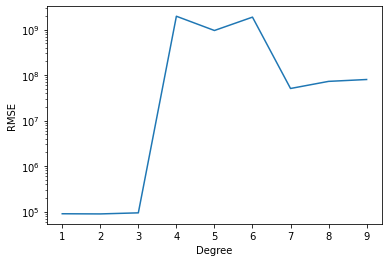

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly= poly_features.fit_transform(X) 
    x_poly_train, x_poly_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.30,random_state=1)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [58]:
poly = PolynomialFeatures(degree=2)
X_poly= poly.fit_transform(X) 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.30,random_state=1)
lin2 = LinearRegression() 
lin2.fit(x_train,y_train) 

y_pred = lin2.predict(x_test)

train_r2 = lin2.score(x_train,y_train)
test_r2  = lin2.score(x_test,y_test)
mae      = mean_absolute_error(y_test, y_pred)
mse      = mean_squared_error(y_test, y_pred)
rmse     = sqrt(mean_squared_error(y_test, y_pred))

model_names.append("Linear Regression - Polynomial Features")
train_r2_scores.append(train_r2)
test_r2_scores.append(test_r2)
mae_values.append(mae)
mse_values.append(mse)
rmse_values.append(rmse)

print("*** Linear Regression - Polynomial Features ***")
print("Train R-squared: ", train_r2)
print("Test R-squared: ", test_r2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

*** Linear Regression - Polynomial Features ***
Train R-squared:  0.39342438752314524
Test R-squared:  0.3274033913566373
MAE:  70632.01434034416
MSE:  8235835009.020794
RMSE:  90751.50141469172


### Comapare Scores and Errors of different Regression Models

In [59]:
reg_df = pd.DataFrame(list(zip(train_r2_scores, test_r2_scores, mae_values, mse_values, rmse_values)), 
                      index = model_names, 
                      columns =['Train_R2', 'Test_R2', 'MAE', 'MSE', 'RMSE']) 
reg_df

,Train_R2,Test_R2,MAE,MSE,RMSE
Linear Regression,0.360149,0.347553,69273.480304,7.989112e+09,89381.833355
SVR - RBF,-0.003659,-0.007814,84368.469073,1.234052e+10,111087.896784
Random Forest Regressor,0.911977,0.338863,70536.600807,8.095519e+09,89975.104047
Linear SVR,0.112566,0.112140,80102.812704,1.087170e+10,104267.431053
Lasso,0.360149,0.347553,69273.483494,7.989112e+09,89381.833946
Ridge,0.360149,0.347553,69273.480304,7.989112e+09,89381.833355
Logistic Regression,0.115669,0.107075,82258.126195,1.215136e+10,110233.204910
Decision Tree Regressor,1.000000,-0.381904,101149.139579,1.692119e+10,130081.464400
AdaBoost Regressor,0.391611,0.299777,73212.789276,8.574116e+09,92596.520297
GradBoost Regressor,0.568164,0.296355,72202.205535,8.616013e+09,92822.481943


## Conclusion

### From the above comparison chart, its evident that Linear Regression - Plynomial with Degree 2 has gives best results comapred to other regression Models i.e. train and test r2_scores around 0.40 and RMSE with 90751

## Visualization of Best Fit

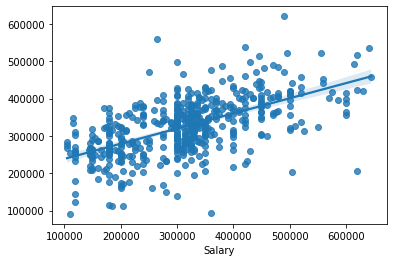

In [60]:
sns.regplot(x=y_test,y=y_pred) ## Showing the relationship between train and test data according to Linear Regression as it was the best Regression model

### Since we see that, we cant further increase efficiency of regression models, let's deal this as classification problem

### Let's try to modify this as a classification problem by creating 3 bins from salary columns ##

In [61]:
def sal(x):
    if x > 1000000:
        return 'High packg'
    elif x > 500000 and x <= 1000000:
        return 'Good packg'
    elif x > 350000 and x <= 500000:
        return 'Average packg'
    else:
        return 'Low packg'

In [62]:
df = train.copy()
df.head()

,ID,Salary,JobCity,Gender,10percentage,12graduation,12percentage,12board,CollegeTier,Degree,...,CollegeCityTier,GraduationYear,Domain,Age,Experience,Cognitive Test Scores,10 Board,12 Board,Personality Trait Score,Designations
0,203097,420000,Bangalore,f,84.30,2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,0,2011,0.635979,25,2,63.591794,State Board,State Board,0.64456,others
1,579905,500000,Indore,m,85.40,2007,85.0,cbse,2,B.Tech/B.E.,...,0,2012,0.960603,25,1,80.941599,CBSE,CBSE,0.32822,manager
2,810601,325000,Chennai,f,85.00,2010,68.2,cbse,2,B.Tech/B.E.,...,0,2014,0.450877,22,0,59.983428,CBSE,CBSE,0.39006,engineer
5,1027655,300000,Hyderabad,m,89.92,2010,87.0,state board,2,B.Tech/B.E.,...,0,2014,0.622643,23,0,67.566737,State Board,State Board,-0.96410,engineer
8,552574,600000,Noida,m,90.00,2009,91.2,cbse,1,B.Tech/B.E.,...,1,2013,0.694479,23,1,71.150444,CBSE,CBSE,-0.24916,engineer


In [63]:
df['Salary'] = df['Salary'].astype("float")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


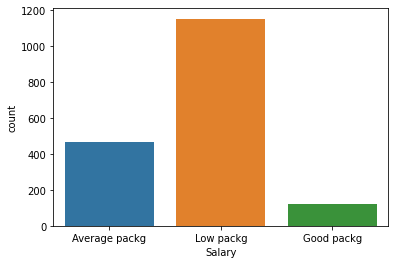

In [64]:
from sklearn.preprocessing import LabelEncoder
df['Salary'] = df['Salary'].apply(sal)
import seaborn as sns
sns.countplot(df['Salary'])

In [65]:
lc = LabelEncoder()
df['Salary'] = lc.fit_transform(df['Salary'])
df.head()

,ID,Salary,JobCity,Gender,10percentage,12graduation,12percentage,12board,CollegeTier,Degree,...,CollegeCityTier,GraduationYear,Domain,Age,Experience,Cognitive Test Scores,10 Board,12 Board,Personality Trait Score,Designations
0,203097,0,Bangalore,f,84.30,2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,...,0,2011,0.635979,25,2,63.591794,State Board,State Board,0.64456,others
1,579905,0,Indore,m,85.40,2007,85.0,cbse,2,B.Tech/B.E.,...,0,2012,0.960603,25,1,80.941599,CBSE,CBSE,0.32822,manager
2,810601,2,Chennai,f,85.00,2010,68.2,cbse,2,B.Tech/B.E.,...,0,2014,0.450877,22,0,59.983428,CBSE,CBSE,0.39006,engineer
5,1027655,2,Hyderabad,m,89.92,2010,87.0,state board,2,B.Tech/B.E.,...,0,2014,0.622643,23,0,67.566737,State Board,State Board,-0.96410,engineer
8,552574,1,Noida,m,90.00,2009,91.2,cbse,1,B.Tech/B.E.,...,1,2013,0.694479,23,1,71.150444,CBSE,CBSE,-0.24916,engineer


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


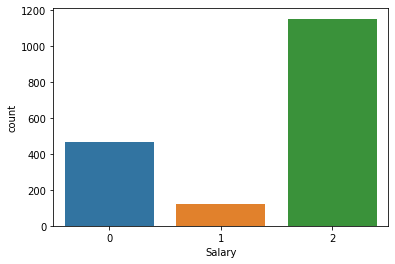

In [66]:
sns.countplot(df['Salary'])

In [67]:
classif_data_df = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage','Salary']]

### Bi-Variate Analysis (Pair plot)

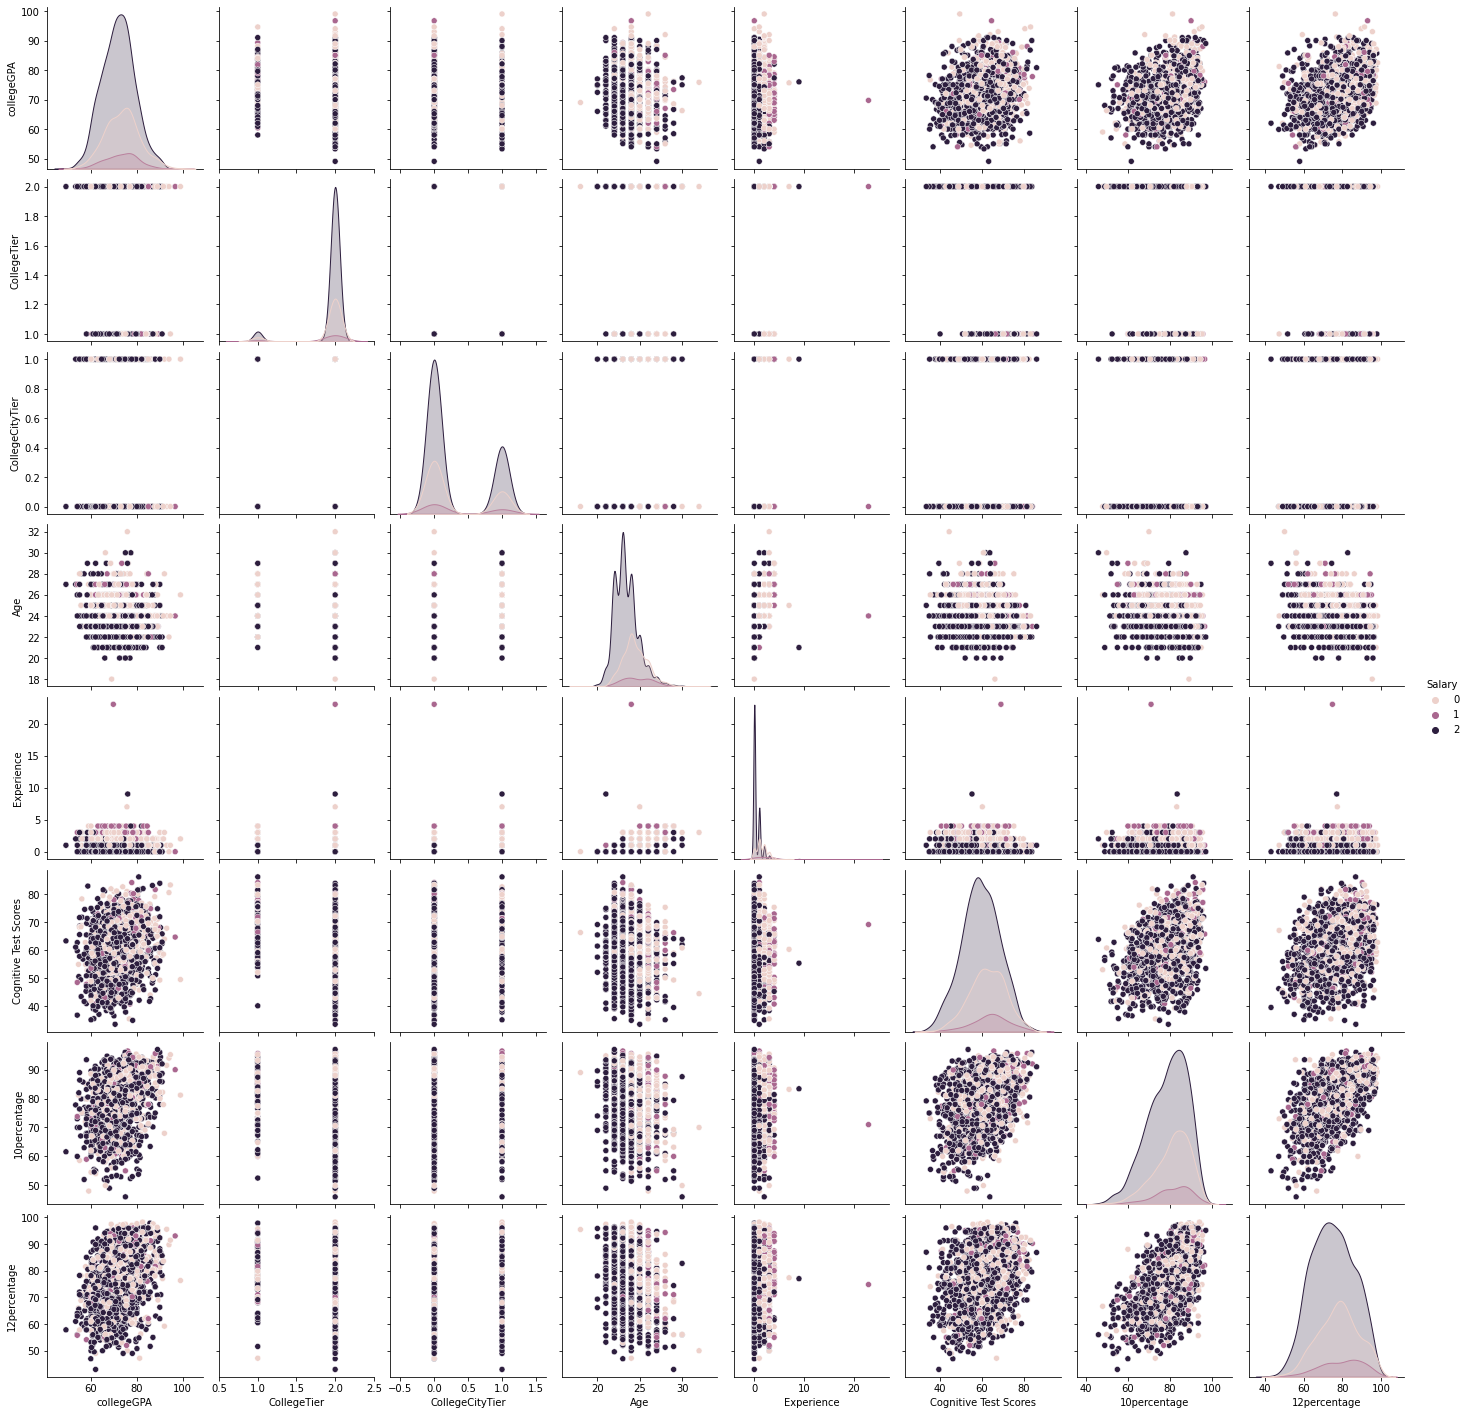

In [68]:
sns.pairplot(data=classif_data_df,  hue = 'Salary')

### Defining feature and target set

In [69]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

### Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

### K-Best Features (Featurization)

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(10,'Score'))  

                 Feature       Score
4             Experience  160.696262
3                    Age   74.780394
5  Cognitive Test Scores   23.858718
7           12percentage   21.264118
1            CollegeTier    8.749648
6           10percentage    8.428431
0             collegeGPA    7.969229
2        CollegeCityTier    0.916501


# Model Building

### Null Accuracy

In [72]:
y_test.value_counts()

2    375
0    121
1     27
Name: Salary, dtype: int64

In [73]:
# Null Accuracy
#---------------
avg_pckg  = y_test.value_counts()[0]
good_pckg = y_test.value_counts()[1]
low_pckg  = y_test.value_counts()[2]
print("Data points with Average Package    : ", avg_pckg)
print("Data points with Good Package       : ", good_pckg)
print("Data points with Low Package        : ", low_pckg)
print("---------------------NULL ACCURACY---------------------------")
print(y_test.value_counts().head(1) / len(y_test))

Data points with Average Package    :  121
Data points with Good Package       :  27
Data points with Low Package        :  375
---------------------NULL ACCURACY---------------------------
2    0.717017
Name: Salary, dtype: float64


### Logistic Regression

In [74]:
# train a Simple logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [75]:
# make class predictions for the testing set
y_pred_class = logreg.predict(x_test)

In [76]:
# calculate accuracy
accuracy = []
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7533460803059273


In [77]:
y_test.dtype

dtype('int64')

In [78]:
## To Build Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 58   1  62]
 [ 19   0   8]
 [ 39   0 336]]


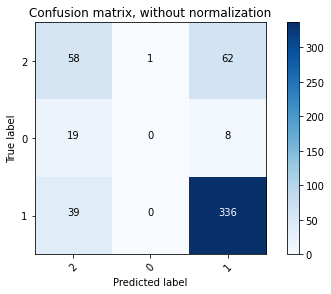

In [79]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


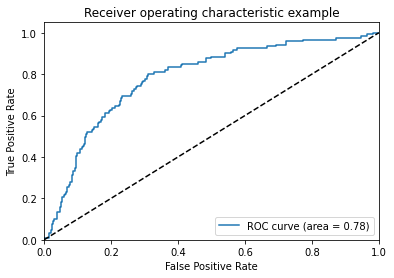

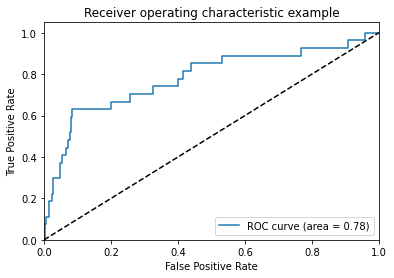

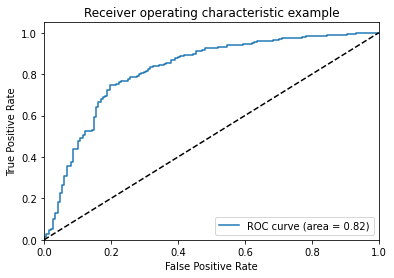

In [80]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(LogisticRegression())
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### KNN (K Nearest Neighbours)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier()

# weights :  optional (default = ‘uniform’)
# weight function used in prediction. Possible values:
#‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# distance measures can be P=1 manhattan, P=2 Euclidian , anyother p value will map to minkowskian

In [82]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier()

In [83]:
# For every test data point, letspredict it's label based on 4 nearest neighbours in this model. T
# The majority class will be assigned to the test data point

y_pred_class = NNH.predict(x_test)

In [84]:
# calculate accuracy
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6347992351816444


Confusion matrix, without normalization
[[ 40   1  80]
 [  7   3  17]
 [ 71  15 289]]


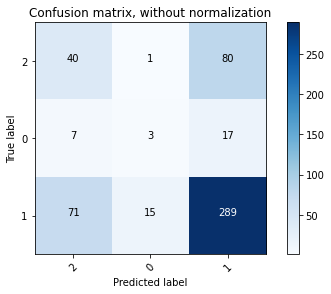

In [85]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - KNN

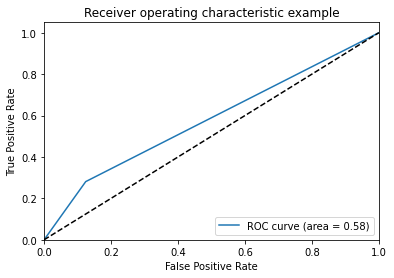

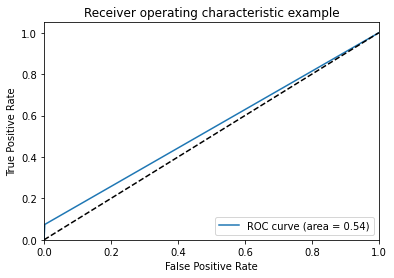

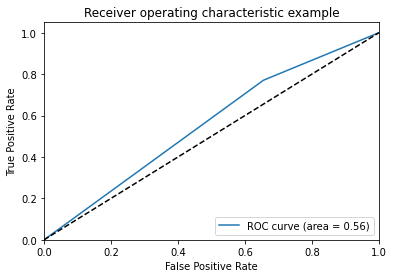

In [86]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Naive Bayes

In [87]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [88]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [89]:
y_pred_class = clf.predict(x_test)

In [90]:
# calculate accuracy
from sklearn import metrics
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7208413001912046


Confusion matrix, without normalization
[[ 51  15  55]
 [ 11   6  10]
 [ 29  26 320]]


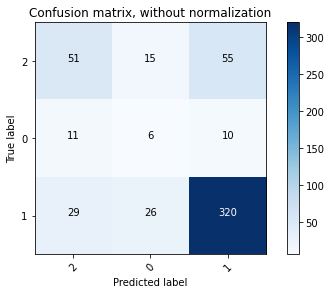

In [91]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Naive Bayes

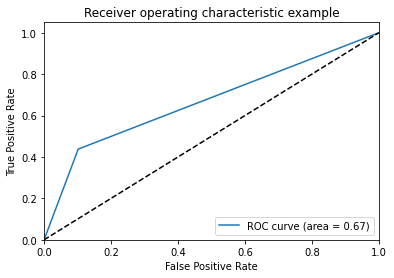

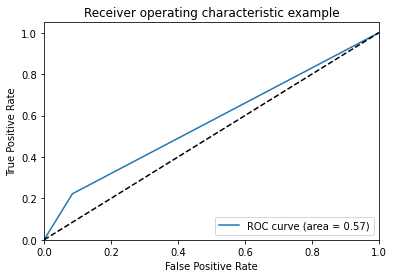

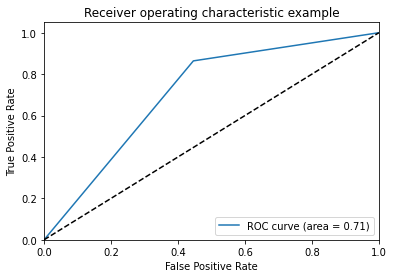

In [92]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### SVM - Linear Model

In [93]:
# train a SVM model on the training set
from sklearn import svm
# To find the best C and Gamma hyper-parameters we need to use Grid-Search, here using some random/default params to start with
clf = svm.SVC(C=1, kernel='linear', gamma= 0.2)
clf.fit(x_train, y_train)

SVC(C=1, gamma=0.2, kernel='linear')

In [94]:
# make class predictions for the testing set
y_pred_class = clf.predict(x_test)

In [95]:
# calculate accuracy
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7724665391969407


Confusion matrix, without normalization
[[ 67   0  54]
 [ 18   0   9]
 [ 38   0 337]]


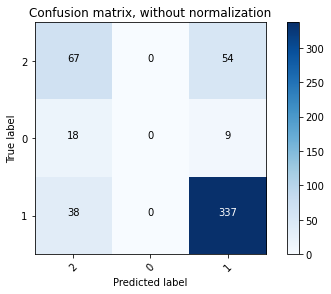

In [96]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - SVM Linear

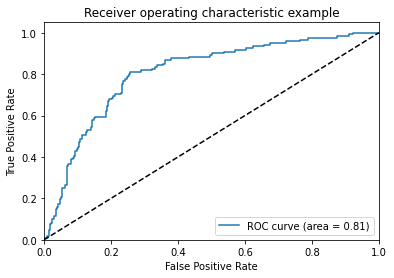

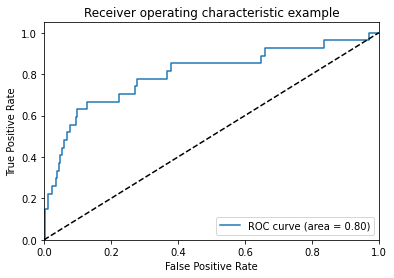

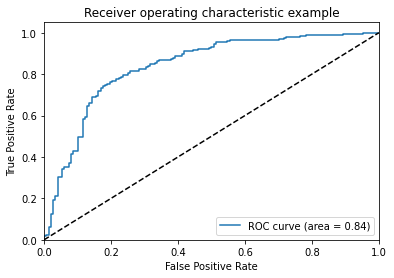

In [97]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(svm.SVC(C=1, kernel='linear', gamma= 0.2))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### SVM - RBF Model

In [98]:
# train a SVM model on the training set
from sklearn import svm
# To find the best C and Gamma hyper-parameters we need to use Grid-Search, here using some random/default params to start with
clf = svm.SVC(C=1, kernel='rbf', gamma=0.2)
clf.fit(x_train, y_train)

SVC(C=1, gamma=0.2)

In [99]:
# make class predictions for the testing set
y_pred_class = clf.predict(x_test)

In [100]:
# calculate accuracy
accuracy.append(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7131931166347992


Confusion matrix, without normalization
[[  0   0 121]
 [  0   0  27]
 [  2   0 373]]


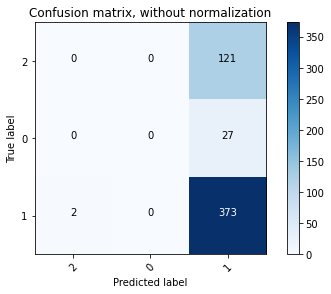

In [101]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - SVM RBF

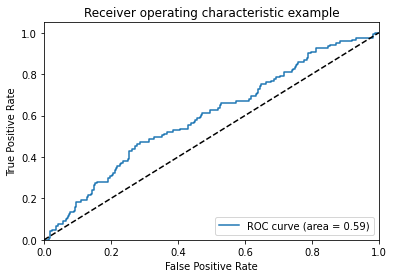

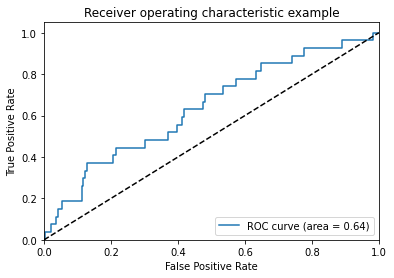

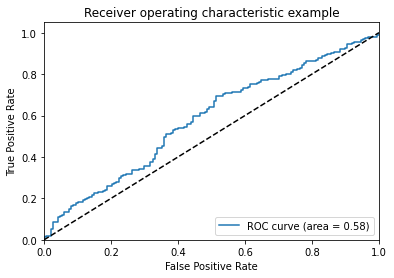

In [102]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(svm.SVC(C=1, kernel='rbf', gamma=0.2))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Decision Trees

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [104]:
y_pred_class = dt_model.predict(x_test)

In [105]:
accuracy.append(dt_model.score(x_test, y_test))
dt_model.score(x_test, y_test)  

0.609942638623327

Confusion matrix, without normalization
[[ 53  15  53]
 [ 12   6   9]
 [ 95  20 260]]


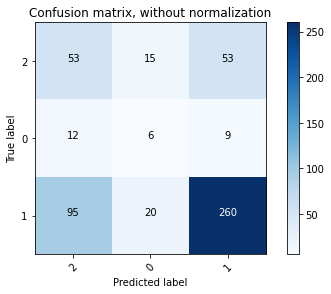

In [106]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Decision Trees

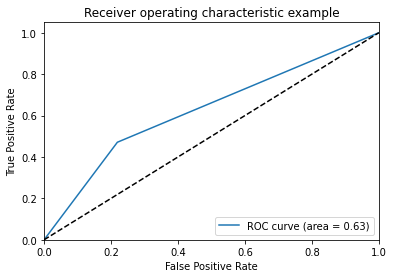

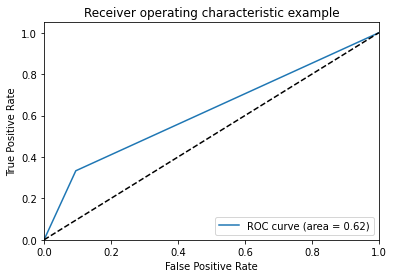

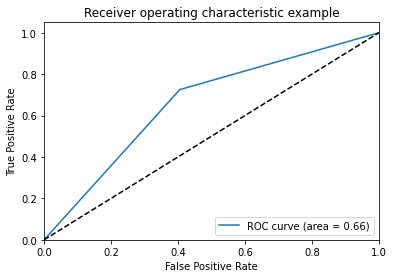

In [107]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'entropy' ))
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble Learning - Bagging

In [108]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7)
#bgcl = BaggingClassifier(n_estimators=9 , max_samples=.7)
bgcl = bgcl.fit(x_train, y_train)

In [109]:
y_pred_class = bgcl.predict(x_test)
accuracy.append(bgcl.score(x_test, y_test))
bgcl.score(x_test, y_test)

0.7323135755258127

Confusion matrix, without normalization
[[ 64   7  50]
 [ 11   6  10]
 [ 58   4 313]]


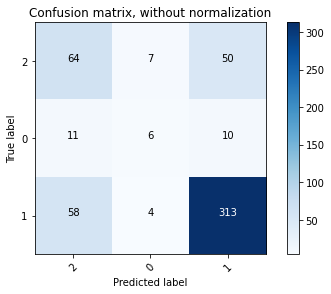

In [110]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Bagging

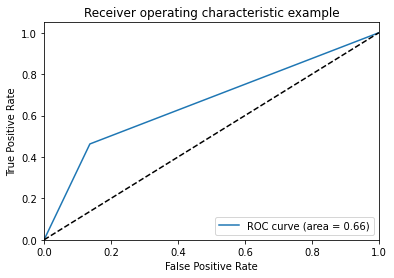

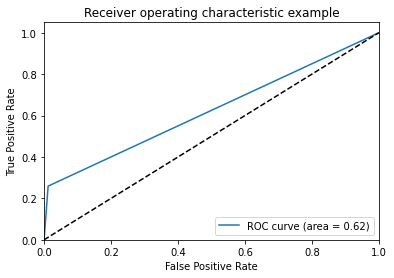

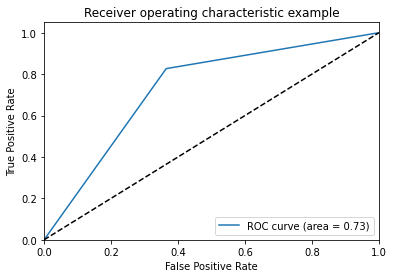

In [111]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7))
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble Learning - AdaBoosting

In [112]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(x_train, y_train)

In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [114]:
y_pred_class = abcl.predict(x_test)
accuracy.append(abcl.score(x_test, y_test))
abcl.score(x_test, y_test)

0.7476099426386233

Confusion matrix, without normalization
[[ 72   7  42]
 [ 13   5   9]
 [ 57   4 314]]


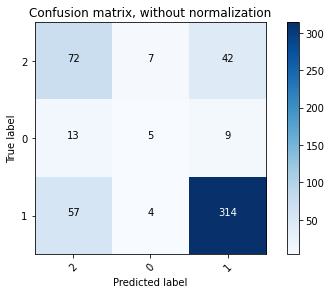

In [115]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - AdaBoost

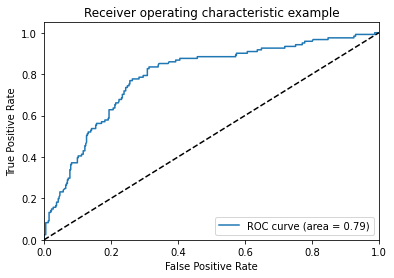

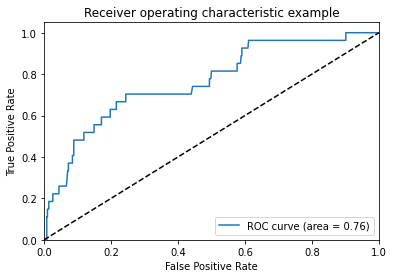

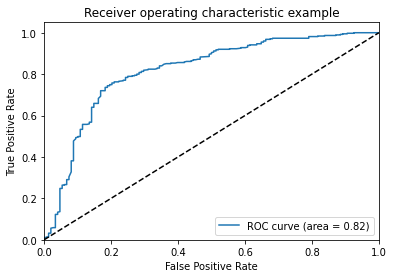

In [116]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(AdaBoostClassifier( n_estimators= 50))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble Learning - GradientBoost

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)

In [118]:
y_pred_class = gbcl.predict(x_test)
accuracy.append(gbcl.score(x_test, y_test))
gbcl.score(x_test, y_test)

0.768642447418738

Confusion matrix, without normalization
[[ 72   1  48]
 [ 14   3  10]
 [ 46   2 327]]


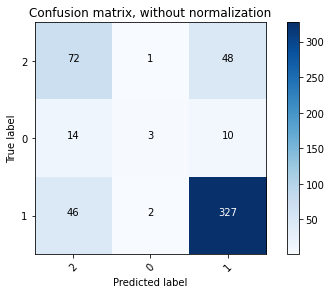

In [119]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Gradient Boosting

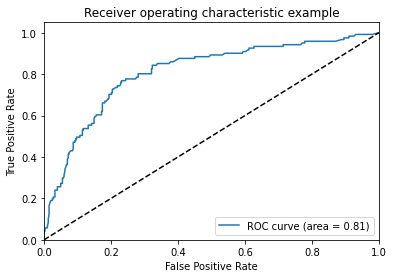

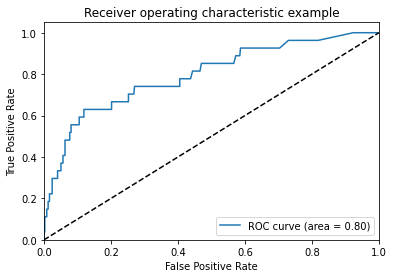

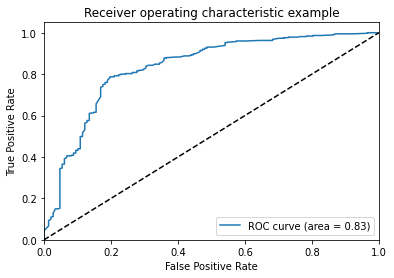

In [120]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05))
y_score = clf.fit(X_train,Y_train).decision_function(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Ensemble RandomForest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [122]:
y_pred_class = rfcl.predict(x_test)
accuracy.append(rfcl.score(x_test, y_test))
rfcl.score(x_test, y_test)

0.7533460803059273

Confusion matrix, without normalization
[[ 66   1  54]
 [ 14   5   8]
 [ 48   4 323]]


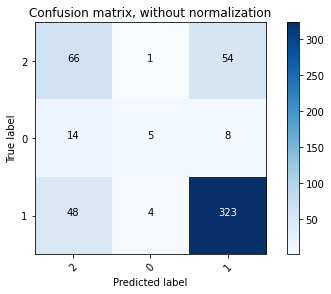

In [123]:
# IMPORTANT: first argument is true values, second argument is predicted values
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=pd.unique(y_train),
                      title='Confusion matrix, without normalization')

### Binarize for OneVsRest Classifier for displaying ROC and AUC Curves)

### One Vs Rest (ROC/AUC for Multiclass) - Random Forest

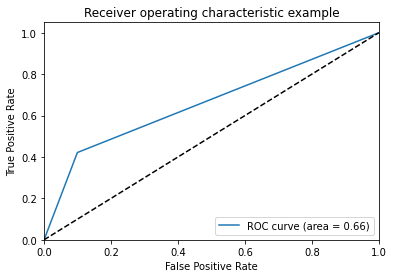

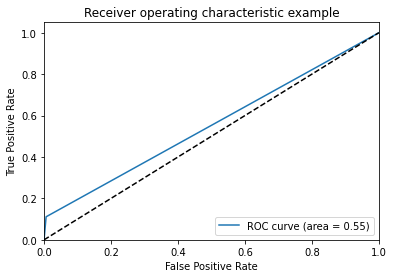

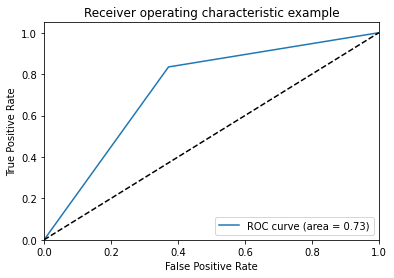

In [124]:
X = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage']]
Y = df['Salary']

from sklearn.preprocessing import label_binarize
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.30,random_state=1)

from sklearn.multiclass import OneVsRestClassifier

# classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 50))
clf.fit(X_train, Y_train)
y_score = clf.predict(X_test)

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Accuracy Scores Comparison for all the classification models

### Logistic", "KNN", "Naive_bayes", "SVM_Linear", "SVM_RBF", "Decision_Tree", "Bagging", "AdaBoost",  "GradBoost", "Random_Forest

In [128]:
models = ["Logistic","KNN", "Naive_bayes","SVM_Linear","SVM_RBF","Decision_Tree","Bagging","AdaBoost","GradBoost","Random_Forest"]

In [129]:
def eg3_lc(keys, values):
    return { keys[i] : values[i] for i in range(len(keys)) }

In [130]:
eg3_lc(models, accuracy)

{'Logistic': 0.7533460803059273,
 'KNN': 0.6347992351816444,
 'Naive_bayes': 0.7208413001912046,
 'SVM_Linear': 0.7724665391969407,
 'SVM_RBF': 0.7131931166347992,
 'Decision_Tree': 0.609942638623327,
 'Bagging': 0.7323135755258127,
 'AdaBoost': 0.7476099426386233,
 'GradBoost': 0.768642447418738,
 'Random_Forest': 0.7533460803059273}

# K Fold Cross Validation

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg,X,Y, cv=10)
logreg_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.72571429, 0.73714286, 0.71264368, 0.68965517, 0.6954023 ,
       0.72988506, 0.75287356, 0.74137931, 0.73563218, 0.77011494])

In [132]:
clf = GaussianNB()
NB_scores = cross_val_score(clf,X,Y, cv=10)
NB_scores

array([0.68571429, 0.66285714, 0.72413793, 0.65517241, 0.68390805,
       0.68965517, 0.72988506, 0.68965517, 0.6954023 , 0.76436782])

In [133]:
KNNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')
KNN_scores = cross_val_score(KNNH,X,Y, cv=10)
KNN_scores

array([0.61714286, 0.65142857, 0.61494253, 0.60344828, 0.66091954,
       0.62643678, 0.62643678, 0.68965517, 0.63793103, 0.68965517])

In [134]:
from sklearn import svm
svmlnr = svm.SVC(C=1, kernel='linear',gamma=0.2)
svmlnr_scores = cross_val_score(svmlnr,X,Y, cv=10)
svmlnr_scores

array([0.76      , 0.73142857, 0.7183908 , 0.7183908 , 0.70114943,
       0.74137931, 0.72988506, 0.73563218, 0.75287356, 0.8045977 ])

In [135]:
svmrbf = svm.SVC(C=1, kernel='rbf',gamma=0.2)
svmrbf_scores = cross_val_score(svmrbf, X,Y, cv=10)
svmrbf_scores

array([0.66285714, 0.65714286, 0.66091954, 0.64367816, 0.66091954,
       0.66091954, 0.66091954, 0.66666667, 0.65517241, 0.66091954])

In [136]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_scores = cross_val_score(dt_model,X,Y, cv=10)
dt_scores

array([0.64      , 0.60571429, 0.59770115, 0.63793103, 0.68965517,
       0.66091954, 0.63218391, 0.61494253, 0.64367816, 0.62068966])

In [137]:
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=19, max_samples=.7)
bgcl_scores = cross_val_score(bgcl,X,Y, cv=10)
bgcl_scores

array([0.72      , 0.76      , 0.67241379, 0.70689655, 0.72988506,
       0.71264368, 0.68965517, 0.68965517, 0.71264368, 0.74137931])

In [138]:
abcl = AdaBoostClassifier( n_estimators= 50)
abcl_scores = cross_val_score(abcl,X,Y, cv=10)
abcl_scores

array([0.76      , 0.69714286, 0.66666667, 0.6954023 , 0.73563218,
       0.74712644, 0.72413793, 0.67816092, 0.7183908 , 0.73563218])

In [139]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl_scores = cross_val_score(gbcl,X,Y, cv=10)
gbcl_scores

array([0.73142857, 0.72      , 0.71264368, 0.6954023 , 0.74712644,
       0.74137931, 0.70114943, 0.72988506, 0.75287356, 0.79885057])

In [140]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl_scores = cross_val_score(rfcl,X,Y, cv=10)
rfcl_scores

array([0.70857143, 0.74285714, 0.67816092, 0.68965517, 0.74712644,
       0.6954023 , 0.67241379, 0.6954023 , 0.71264368, 0.73563218])

In [141]:
cross_val_scores_df = pd.DataFrame(np.hstack((logreg_scores,NB_scores,KNN_scores,svmlnr_scores,svmrbf_scores,dt_scores,bgcl_scores,abcl_scores,gbcl_scores,rfcl_scores)))

In [142]:
cross_val_scores_df['Method'] = ["Mthod"]*100
cross_val_scores_df.columns = ["Scores","Method"]
for i in range(100):
    if i < 10:
        cross_val_scores_df.loc[i,'Method'] = 'Lgt_Regrsn'
    elif (i >= 10) and (i < 20):
        cross_val_scores_df.loc[i,'Method'] = 'Naive_Bayes'
    elif (i >= 20) and (i < 30):
        cross_val_scores_df.loc[i,'Method'] = 'KNN'
    elif (i >= 30) and (i < 40):
        cross_val_scores_df.loc[i,'Method'] = 'SVM_Linear'
    elif (i >= 40) and (i < 50):
        cross_val_scores_df.loc[i,'Method'] = 'SVM_RBF'
    elif (i >= 50) and (i < 60):
        cross_val_scores_df.loc[i,'Method'] = 'Decision_Tree'
    elif (i >= 60) and (i < 70):
        cross_val_scores_df.loc[i,'Method'] = 'Bagging'
    elif (i >= 70) and (i < 80):
        cross_val_scores_df.loc[i,'Method'] = 'Ada_Boost'
    elif (i >= 80) and (i < 90):
        cross_val_scores_df.loc[i,'Method'] = 'Grad_Boost'
    elif (i >= 90) and (i < 100):\
        cross_val_scores_df.loc[i,'Method'] = 'Random_Forest'


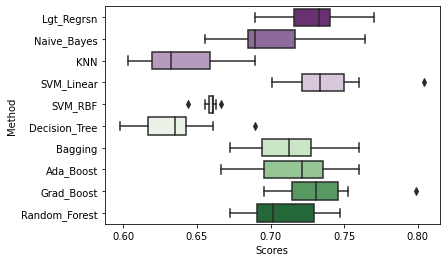

In [143]:
sns.boxplot(x="Scores", y="Method", data=cross_val_scores_df, palette="PRGn")

# Conclusion

### Apart from Ensemble Method, Logistic and SVM Linear Produced decent accuracy in 10 fold Cross Validation
### Considering Ensemble, AdaBoost and Gradient Boost showed High Accuracy Scores
### Model with the Least accuracy score is Decision tree
### Gradient Boost, SVM RBF and Ada Boost are having lesser variance with Good Accuracy Score


# We chose Gradient Boosting as final model because of,
### 1. Good Accuracy Range
### 2. No visible outliers
### 3. No drastic shift of Median
### 4. Less Variance

## Bootsrap Range Estimate for Gradient Boosting

In [ ]:
data = df[['collegeGPA','CollegeTier','CollegeCityTier','Age','Experience', 'Cognitive Test Scores','10percentage','12percentage','Salary']]

In [ ]:
n_iterations = 100                # Number of bootstrap samples to create
n_size = int(len(data) * 0.70)   # picking only 70 % of the given data in every bootstrap sample
print(round(n_size*0.7))

1800


In [ ]:
values =  data.values

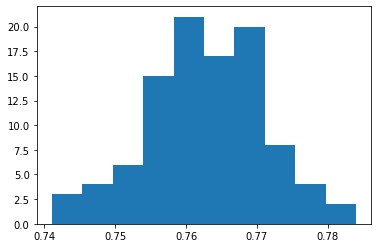

95.0 confidence interval 74.5% and 77.8%


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy
stats1 = list()
for i in range(n_iterations):
      
    train = resample(values, n_samples=n_size)
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])

    model = GradientBoostingClassifier()
    model.fit(train[:,:-1], train[:,-1])

    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)    
    stats1.append(score)
    
    
from matplotlib import pyplot
pyplot.hist(stats1)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats1, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats1, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Conclusion:

## With 95% of confidence interval, we see that "Gradient Boosting" produced better accuracy range of 74.5-77.8% with this implementation.